# Pymaceuticals Inc.
---

### Analysis
- Correlation between weight and tumor volume is linear and positive as the value is close to +1)
- Regimens with the highest count of mice were Ramicane and Capomulin

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

combined_df = pd.merge(mouse_metadata, study_results, how='outer', on="Mouse ID")


# Display the data table for preview
combined_df.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
number_of_mice = combined_df["Mouse ID"].nunique()
number_of_mice

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_ID = combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_ID

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_df = combined_df.loc[combined_df["Mouse ID"] == "g989", :]
duplicate_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
drop_dup_mouse = combined_df[combined_df['Mouse ID'].isin(duplicate_ID)==False]
drop_dup_mouse.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.
num_cleanmice = drop_dup_mouse["Mouse ID"].nunique()
num_cleanmice

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean = drop_dup_mouse['Tumor Volume (mm3)'].groupby(drop_dup_mouse['Drug Regimen']).mean()
median = drop_dup_mouse['Tumor Volume (mm3)'].groupby(drop_dup_mouse['Drug Regimen']).median()
var = drop_dup_mouse['Tumor Volume (mm3)'].groupby(drop_dup_mouse['Drug Regimen']).var()
std = drop_dup_mouse['Tumor Volume (mm3)'].groupby(drop_dup_mouse['Drug Regimen']).std()
sem = drop_dup_mouse['Tumor Volume (mm3)'].groupby(drop_dup_mouse['Drug Regimen']).sem()

summary_mice_stat = pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Tumor Volume Variance":var, 
                           "Tumor Volume Std. Dev.":std, 
                           "Tumor Volume Std. Err.":sem})
summary_mice_stat



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_stat_aggregation =  drop_dup_mouse.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stat_aggregation

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Mice per Treatment')

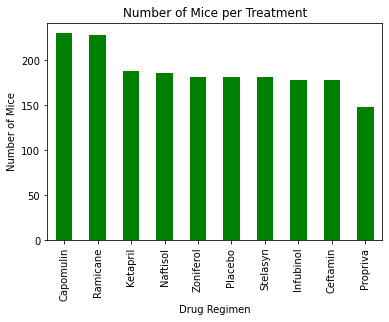

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

mice_count = drop_dup_mouse["Drug Regimen"].value_counts()


plot_pandas = mice_count.plot.bar(color='g')  
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Treatment")


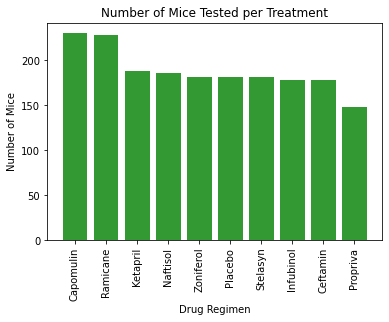

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = mice_count.index.values
y_axis = mice_count.values

plt.bar(x_axis, y_axis, color='g', alpha=0.8, align='center')

plt.title("Number of Mice Tested per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation="vertical")

plt.show()


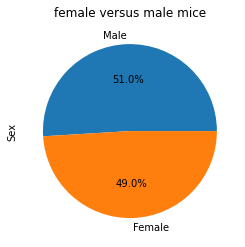

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

mouse_gender_data = drop_dup_mouse["Sex"].value_counts()
plt.title("female versus male mice")
mouse_gender_data.plot.pie(autopct= "%1.1f%%")
plt.show()

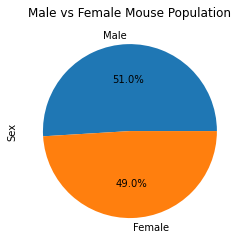

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
plot = mouse_gender_data.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex')
plt.show()


## Quartiles, Outliers and Boxplots

In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

regimen_list = summary_mice_stat.loc[summary_mice_stat["Tumor Volume Std. Err."] < 0.5].index.to_list()


# Start by getting the last (greatest) timepoint for each mouse
# Start by getting the last (greatest) timepoint for each mouse
max_df = drop_dup_mouse[drop_dup_mouse["Drug Regimen"].isin(regimen_list)].groupby("Mouse ID").max()

max_df = drop_dup_mouse.loc[drop_dup_mouse["Drug Regimen"].isin(regimen_list),["Mouse ID", "Timepoint"]]
max_df = max_df.groupby(["Mouse ID"], sort=False)["Timepoint"].max().reset_index()      

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_mice_vol = pd.merge(max_df, drop_dup_mouse, how="inner", on=["Mouse ID", "Timepoint"])
max_mice_vol.head(1)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,k403,45,Ramicane,Male,21,16,22.050126,1


In [24]:
# Put treatments into a list for for loop (and later for plot labels)
# altering order to match results
regimen_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting); also for box plot
tvol_all = []

# Define function to return outliers for specific column conditioned by filters
def get_outliers(in_series):
            
    # Calculate the IQR and quantitatively determine if there are any potential outliers.    
    quartiles = in_series.quantile([.25, .50, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outseries = in_series.where((in_series < lower_bound) | (in_series > upper_bound)).dropna()
    
    return outseries
 
    
# Locate the rows which contain mice on each drug and get the tumor volumes
for i in range(0, len(max_mice_vol)):
    tvolume = float(max_mice_vol.loc[i, "Tumor Volume (mm3)"])
    if tvolume not in tvol_all:
        tvol_all.append(tvolume)    
    
# add subset 
for regimen in regimen_list:
        matchcol = "Drug Regimen"
        outliercol = "Tumor Volume (mm3)" 
        temp_df = max_mice_vol.loc[max_mice_vol[matchcol] == regimen, [outliercol]]
        ts = temp_df.iloc[:,0]
        
        # save the tumor volume for each regimen as list for use in box plot
        if regimen == "Capomulin":
            tv_1 = ts.tolist()
        elif regimen == "Ramicane":
            tv_2 = ts.tolist()
        elif regimen == "Infubinol":
            tv_3 = ts.tolist()
        else:
            tv_4 = ts.tolist()
        
        # call function to give outliers and print results
        outliers = get_outliers(ts)
        print(f"{regimen}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 58    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


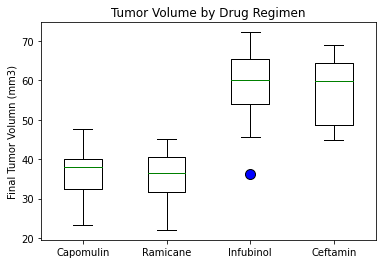

In [26]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tvdf = pd.DataFrame({"Capomulin": tv_1,
                     "Ramicane": tv_2,
                     "Infubinol": tv_3,
                     "Ceftamin": tv_4
                    })

ax = tvdf.plot(kind='box', grid=False, color='black', medianprops=dict(color="green"), 
               flierprops=dict(markerfacecolor='blue', markersize=10), title="Tumor Volume by Drug Regimen")
ax.set_ylabel("Final Tumor Volumn (mm3)")
plt.show()




## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

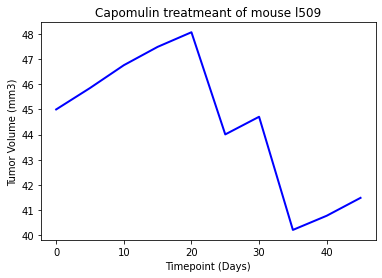

In [30]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_df = drop_dup_mouse.loc[drop_dup_mouse["Mouse ID"] == "l509",:]
line_df.head()
x_axis = line_df["Timepoint"]
tumsiz = line_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, tumsiz,linewidth=2,color="blue", label="Fahreneit")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')


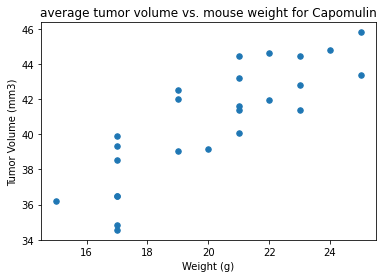

In [35]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

cap_mice = drop_dup_mouse.loc[drop_dup_mouse["Drug Regimen"] == "Capomulin", 
                               ["Mouse ID","Weight (g)", "Tumor Volume (mm3)"]]
cap_mice_avg = cap_mice.groupby("Mouse ID").mean()
cap_mice_avg.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", s=30, title="average tumor volume vs. mouse weight for Capomulin")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


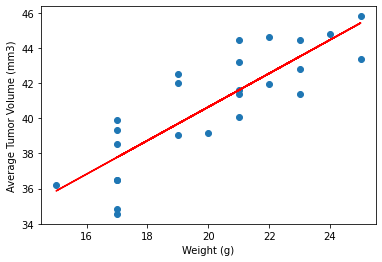

In [38]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = cap_mice_avg['Weight (g)']
y_values = cap_mice_avg['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
      
plt.show()